<a href="https://colab.research.google.com/github/louispaulet/Classfication_and_Representation_Learning_course/blob/main/CLR_Project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the needed libraries and data.txt from Google Drive

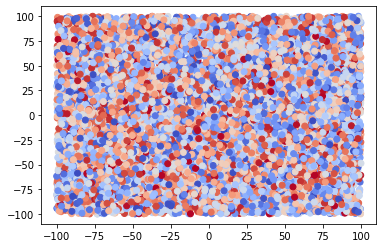

In [ ]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from google.colab import files


matrix_pos = np.loadtxt(open('data.txt'),delimiter=',')

def display_cells(cell_matrix):
  #get x and y coords from matrix
  x = cell_matrix[:, 1]
  y = cell_matrix[:, 2]
  c = cell_matrix[:, 3]
  print(plt.scatter(x, y,c=c, cmap=cm.coolwarm))
  plt.show()

display_cells(matrix_pos)

Some refactoring took place between V1 and V2 to extract the scoring functions.
Functions below are in separate blocks for easier testing.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

#project parameters
current_coords = [[0, 0]]
time_left = 10000
score = 0
eaten_list = []

def compute_cell_distances(cell_matrix, position):
  #compute distances between all cells and current point
  distances = euclidean_distances(cell_matrix[:, 1:3], position)

  matrix_distances = np.c_[cell_matrix, distances]

  return matrix_distances

# id, matrix_pos = find_closest_cell(matrix_pos, position)

In [ ]:
def compute_cell_scores(cell_matrix, penality = 1):
  #divide cell score value by distance to compute distance related score
  score = np.divide(cell_matrix[:, 3],cell_matrix[:, 4]**penality)
  cell_matrix = np.c_[cell_matrix, score]

  return cell_matrix

#compute_cell_scores(matrix_pos)[4]  

In [ ]:
def get_best_cell(cell_matrix):
  #get index at which the smallest distance is located
  id = np.where(cell_matrix[:, 5] == np.amax(cell_matrix[:, 5]))[0][0]
  return id

#get_best_cell(matrix_pos)

In [ ]:
def remove_used_scores(cell_matrix):

  cell_matrix = np.delete(cell_matrix, 5, 1)
  cell_matrix = np.delete(cell_matrix, 4, 1)
  return cell_matrix

In [ ]:
def eat_cell(id, time_left, score, eaten_list, cell_matrix, default_position):
  if (time_left - cell_matrix[id][4]) > 0: 
    time_left -= cell_matrix[id][4] #remove time-distance
    score += cell_matrix[id][3] #add score
    current_coords = [[cell_matrix[id][1], cell_matrix[id][2]]] #update position
    eaten_list = np.append(eaten_list, cell_matrix[id][0]) #add cell id to the kill list
    cell_matrix = np.delete(cell_matrix, (id), axis=0) #remove eaten cell
  else:
    current_coords = default_position #case where we can't eat a cell
  return time_left, score, current_coords, eaten_list, cell_matrix

# time_left, score, current_coords, eaten_list, matrix_pos = eat_cell(id, time_left, score, eaten_list, matrix_pos)

# matrix_pos[0]

The game loop is now encapsulated in its own function.

In [ ]:
# time_out = 10000 # worst case scenario emergency exit
# penality = 3.000909090909091

def game_loop(matrix_pos, penalty, time_left, time_out, current_coords, score, eaten_list):
  #game loop
  while(time_left > 0 and time_out > 0 and np.shape(matrix_pos)[0] != 0):

    matrix_pos = compute_cell_distances(matrix_pos, current_coords)
    matrix_pos = compute_cell_scores(matrix_pos, penality)
    id = get_best_cell(matrix_pos)

    default_position = current_coords
    time_left, score, current_coords, eaten_list, matrix_pos = eat_cell(id, time_left, score, eaten_list, matrix_pos, default_position)
    
    matrix_pos = remove_used_scores(matrix_pos)
    
    time_out -= 1

  display_cells(matrix_pos)
  
  return time_left, score, current_coords, time_out, eaten_list

# time_left, score, current_coords,time_out, eaten_list = game_loop(matrix_pos, penality, time_left, time_out, current_coords, score, eaten_list)

We perform some brute-forcing on the penalty variable to yield the best result from 5 runs of the main game loop.

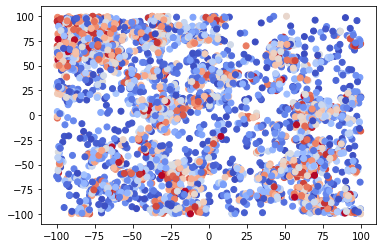

Epoch : 0 Penalty : 2.949 Score : 344966.0


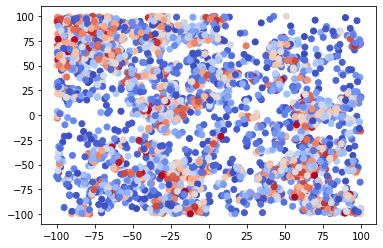

Epoch : 1 Penalty : 2.9499999999999997 Score : 345148.0


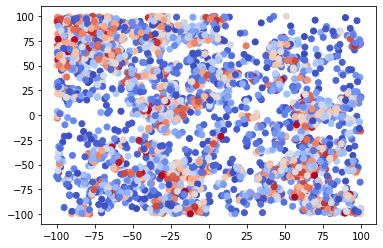

Epoch : 2 Penalty : 2.9509999999999996 Score : 345148.0


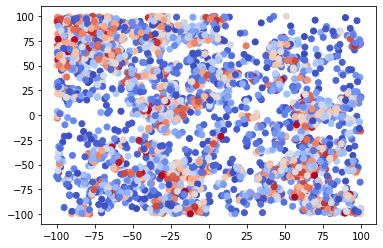

Epoch : 3 Penalty : 2.952 Score : 345148.0


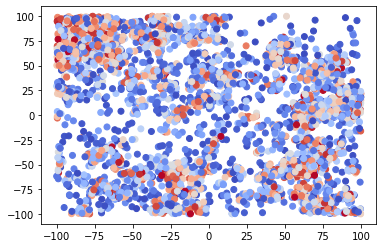

Epoch : 4 Penalty : 2.953 Score : 343590.0


In [ ]:
penalities = np.linspace(2.949, 2.953, 5)
epoch = 0
results = []
for penality in penalities:
  #reset default params
  current_coords = [[0, 0]]
  time_left = 10000
  time_out = 10000 # worst case scenario emergency exit
  score = 0
  eaten_list = []

  time_left, score, current_coords,time_out, eaten_list = game_loop(matrix_pos.copy(), penality, time_left, time_out, current_coords, score, eaten_list)
  results.append([time_left, score, current_coords,time_out, eaten_list])
  print("Epoch : " + str(epoch) + " Penalty : " + str(penality) +" Score : "+ str(score))
  epoch += 1

From the previous runs, we can extract the best result displayed below :

In [ ]:
#detailed stats from the best epoch
results[1]

[0.6202163623388605,
 345148.0,
 [[-46.25, -24.37]],
 0,
 array([5478., 8498.,  220., ..., 2823.,  299., 8580.])]

In [ ]:
#we retrieve the list of eaten cells from the highest score epoch
eaten_list = results[1][4]

In [ ]:
#export text file
eaten_list = eaten_list.astype(int)
np.savetxt(fname="output.csv", delimiter=",",fmt='%i', X=eaten_list)
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
eaten_list

array([5478, 8498,  220, ..., 2823,  299, 8580])